In [59]:
from scipy import stats 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import matplotlib.pyplot as plotter
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn import datasets
from lightgbm import *
pd.set_option("display.max_columns", None)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/ocd-patient-dataset-demographics-and-clinical-data/ocd_patient_dataset.csv


In [60]:
data = pd.read_csv('/kaggle/input/ocd-patient-dataset-demographics-and-clinical-data/ocd_patient_dataset.csv')
display(data.head())

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


**1. Data Preparation**

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [62]:
data.isnull().sum()

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

Terdapat 634 Missing Value

In [63]:
data.nunique() #Mengecek data yang unik
#Pada Patient ID yang seharusnya terdapat 1500 data unik, hanyak 1393 data unik.
#Maka diketahui terdapat duplikasi data

Patient ID                       1393
Age                                58
Gender                              2
Ethnicity                           4
Marital Status                      3
Education Level                     4
OCD Diagnosis Date               1218
Duration of Symptoms (months)     235
Previous Diagnoses                  4
Family History of OCD               2
Obsession Type                      5
Compulsion Type                     5
Y-BOCS Score (Obsessions)          41
Y-BOCS Score (Compulsions)         41
Depression Diagnosis                2
Anxiety Diagnosis                   2
Medications                         3
dtype: int64

In [64]:
data['Patient ID'].duplicated().sum() #Mengecek duplikasi pada kolom 'Patient ID'

107

Duplikasi data = 107

**2. Exploratory Data Analysis** 

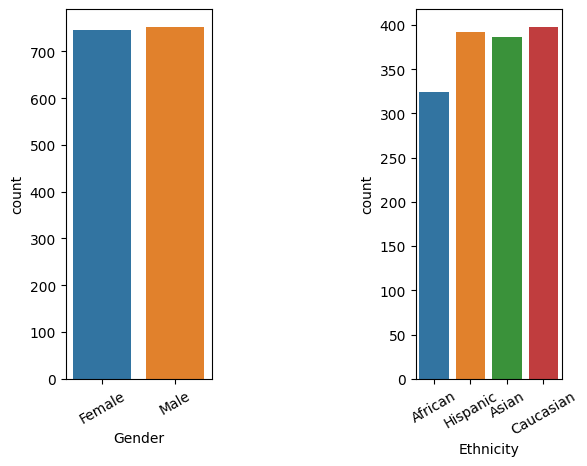

In [65]:
plt.subplot(1, 3, 1)
sns.countplot(x = data["Gender"])
plotter.xticks(rotation = 30);

plt.subplot(1, 3, 3)
sns.countplot(x = data["Ethnicity"])
plotter.xticks(rotation = 30);

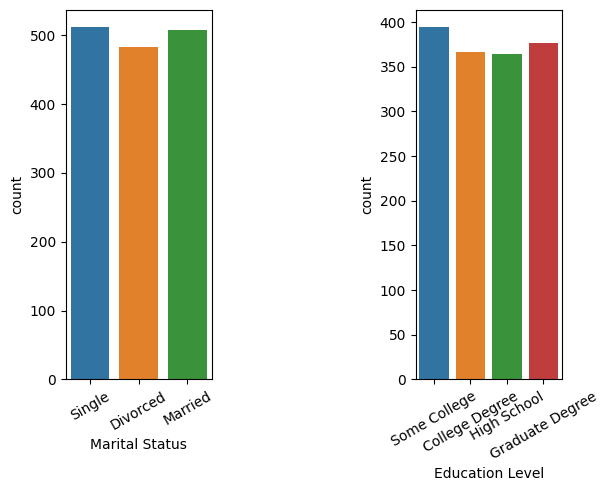

In [66]:
plt.subplot(1, 3, 1)
sns.countplot(x = data["Marital Status"])
plotter.xticks(rotation = 30);

plt.subplot(1, 3, 3)
sns.countplot(x = data["Education Level"])
plotter.xticks(rotation = 30);

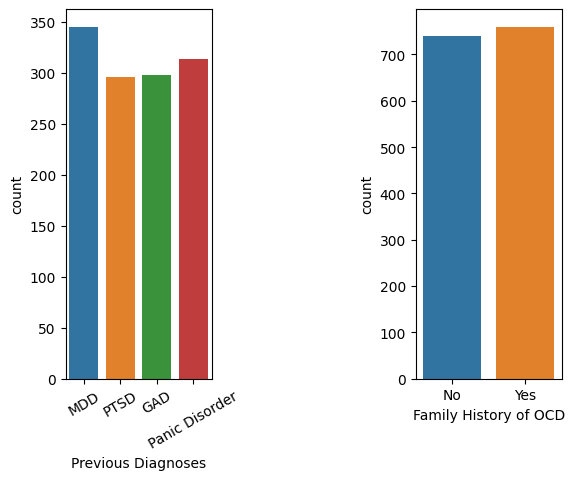

In [67]:
plt.subplot(1, 3, 1)
sns.countplot(x = data["Previous Diagnoses"])
plotter.xticks(rotation = 30);

plt.subplot(1, 3, 3)
sns.countplot(x = data["Family History of OCD"])
plotter.xticks(rotation = 0);

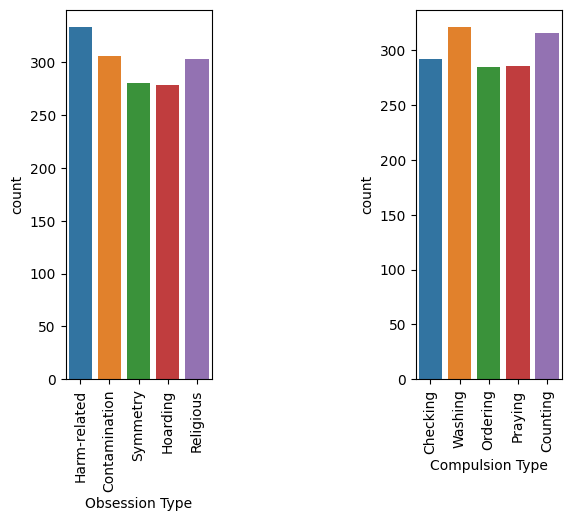

In [68]:
plt.subplot(1, 3, 1)
sns.countplot(x = data["Obsession Type"])
plotter.xticks(rotation = 90);

plt.subplot(1, 3, 3)
sns.countplot(x = data["Compulsion Type"])
plotter.xticks(rotation = 90);

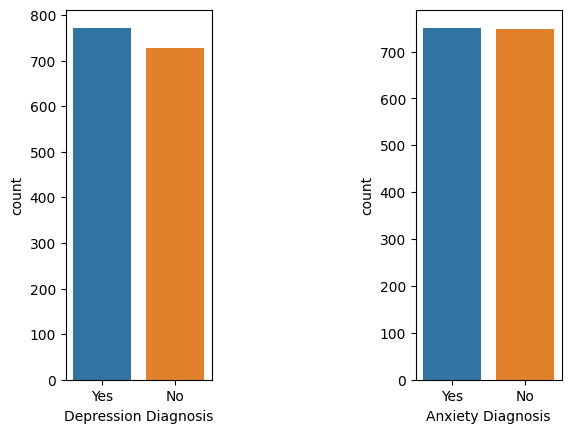

In [69]:
plt.subplot(1, 3, 1)
sns.countplot(x = data["Depression Diagnosis"])
plotter.xticks(rotation = 0);

plt.subplot(1, 3, 3)
sns.countplot(x = data["Anxiety Diagnosis"])
plotter.xticks(rotation = 0);

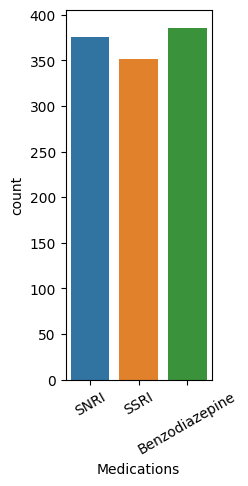

In [70]:
plt.subplot(1, 3, 1)
sns.countplot(x = data["Medications"])
plotter.xticks(rotation = 30);

**3. Preprocessing Data**

In [71]:
data

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,NaN,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


In [72]:
data = data.drop(columns=['Patient ID','OCD Diagnosis Date'],axis=1)
data

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,69,Male,African,Divorced,Some College,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,57,Male,Hispanic,Divorced,College Degree,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,27,Female,Hispanic,Married,College Degree,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,56,Female,Hispanic,Married,High School,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,38,Male,Hispanic,Divorced,College Degree,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,19,Female,Hispanic,Divorced,Graduate Degree,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,40,Male,Asian,Married,Some College,100,NaN,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,37,Female,Caucasian,Married,Some College,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


In [73]:
data = data.dropna()
data

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
2,57,Male,Hispanic,Divorced,College Degree,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,27,Female,Hispanic,Married,College Degree,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
5,32,Female,Asian,Married,College Degree,46,GAD,No,Hoarding,Ordering,26,11,Yes,Yes,SSRI
6,38,Female,Hispanic,Single,College Degree,110,MDD,No,Contamination,Praying,12,16,Yes,No,SNRI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,40,Female,Asian,Divorced,High School,177,MDD,Yes,Harm-related,Counting,27,21,Yes,Yes,SNRI
1494,72,Male,Hispanic,Divorced,Graduate Degree,238,MDD,Yes,Symmetry,Washing,14,25,No,Yes,SNRI
1495,38,Male,Hispanic,Divorced,College Degree,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,19,Female,Hispanic,Divorced,Graduate Degree,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 1498
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            925 non-null    int64 
 1   Gender                         925 non-null    object
 2   Ethnicity                      925 non-null    object
 3   Marital Status                 925 non-null    object
 4   Education Level                925 non-null    object
 5   Duration of Symptoms (months)  925 non-null    int64 
 6   Previous Diagnoses             925 non-null    object
 7   Family History of OCD          925 non-null    object
 8   Obsession Type                 925 non-null    object
 9   Compulsion Type                925 non-null    object
 10  Y-BOCS Score (Obsessions)      925 non-null    int64 
 11  Y-BOCS Score (Compulsions)     925 non-null    int64 
 12  Depression Diagnosis           925 non-null    object
 13  Anxiety D

In [75]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding across team, position, and all_star columns
data[['Gender', 'Ethnicity', 'Marital Status', 'Education Level','Previous Diagnoses','Family History of OCD','Obsession Type','Compulsion Type','Depression Diagnosis','Anxiety Diagnosis','Medications']] = data[['Gender', 'Ethnicity', 'Marital Status', 'Education Level','Previous Diagnoses','Family History of OCD','Obsession Type','Compulsion Type','Depression Diagnosis','Anxiety Diagnosis','Medications']].apply(LabelEncoder().fit_transform)

#view udpated DataFrame
data

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,32,0,0,2,3,203,1,0,1,0,17,10,1,1,1
2,57,1,3,0,0,173,1,0,0,0,3,4,0,0,0
3,27,0,3,1,0,126,2,1,4,4,14,28,1,1,2
5,32,0,1,1,0,46,0,0,2,2,26,11,1,1,2
6,38,0,3,2,0,110,1,0,0,3,12,16,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,40,0,1,0,2,177,1,1,1,1,27,21,1,1,1
1494,72,1,3,0,1,238,1,1,4,4,14,25,0,1,1
1495,38,1,3,0,0,53,1,0,0,4,21,33,1,1,2
1496,19,0,3,0,1,160,0,1,2,3,25,16,1,1,2


In [76]:
#data["Gender"] = ({'Female':0,'Male':1})
#data["Ethnicity"] = ({'African':0,'Asian':1,'Caucasian':2,'Hispanic':3})
#train["Marital Status"] = ({'Divorced':0,'Married':1,'Single':2})
#train["Education Level"] = ({'College Degree':0,'Graduate Degree':1,'High School':2,'Some College':3})
#data["Previous Diagnoses"] = ({'GAD':0,'MDD':1,'PTSD':2,'Panic Disorder':3})
#data["Obsession Type"] = ({'Contamination':0,'Harm-related':1,'Hoarding':2,'Religious':3'Symmetry':4})
#data["Compulsion Type"] = ({'Checking':0,'Counting':1,'Ordering':2,'Praying':3,'Washing':4})
#data["Medications"] = ({'Benzodiazepine':0,'SNRI':1,'SSRI':2})
#display(data)

**4. Data Processing**

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Contoh data (gantilah ini dengan dataset Anda)
# Misalnya, kita akan menggunakan dataset iris
# Memilih kolom-kolom yang akan digunakan untuk klasifikasi
selected_columns = ['Obsession Type', 'Compulsion Type']

# Memisahkan kolom target (label) dan fitur (atribut)
X = data[selected_columns]
y = data['Medications']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Melatih model Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Memprediksi kelas target untuk data pengujian
y_pred_logistic_regression = logistic_regression_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Mengukur akurasi untuk masing-masing model
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Membandingkan nilai akurasi
print(f'Accuracy Logistic Regression: {accuracy_logistic_regression}')
print(f'Accuracy Decision Tree: {accuracy_decision_tree}')

plt.show()

Accuracy Logistic Regression: 0.32432432432432434
Accuracy Decision Tree: 0.3027027027027027


In [78]:
models = ['Logistic Regression', 'Decision Tree']
models_acc = [accuracy_logistic_regression, accuracy_decision_tree]

cols = ['accuracy score']

data_accuracy = pd.DataFrame(data=models_acc , index= models , columns= cols)
data_accuracy

,accuracy score
Logistic Regression,0.324324
Decision Tree,0.302703


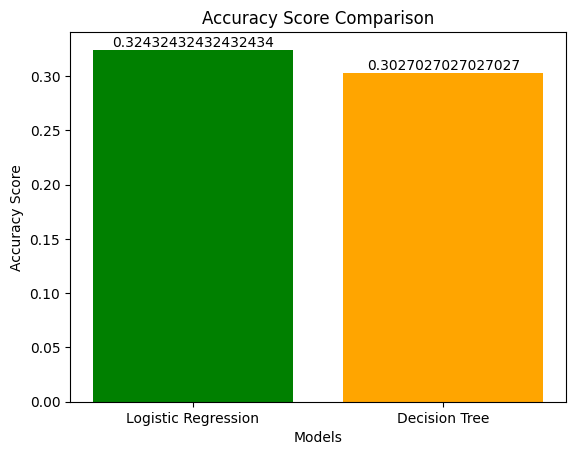

In [79]:
models = ['Logistic Regression', 'Decision Tree']
accuracy_scores = data_accuracy['accuracy score']

colors = ['green', 'orange']

plt.bar(models, accuracy_scores, color=colors)

plt.title('Accuracy Score Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

for i in range(len(models)):
    plt.text(models[i], accuracy_scores[i], str(accuracy_scores[i]), ha='center', va='bottom')

plt.show()

[Text(0.6993243243243243, 0.9285714285714286, 'Compulsion Type <= 3.5\ngini = 0.666\nsamples = 925\nvalue = [324, 310, 291]'),
 Text(0.4797297297297297, 0.7857142857142857, 'Obsession Type <= 2.5\ngini = 0.665\nsamples = 723\nvalue = [255, 250, 218]'),
 Text(0.2972972972972973, 0.6428571428571429, 'Compulsion Type <= 1.5\ngini = 0.665\nsamples = 458\nvalue = [169, 149, 140]'),
 Text(0.17567567567567569, 0.5, 'Obsession Type <= 1.5\ngini = 0.665\nsamples = 234\nvalue = [85, 72, 77]'),
 Text(0.10810810810810811, 0.35714285714285715, 'Obsession Type <= 0.5\ngini = 0.661\nsamples = 167\nvalue = [66, 50, 51]'),
 Text(0.05405405405405406, 0.21428571428571427, 'Compulsion Type <= 0.5\ngini = 0.655\nsamples = 73\nvalue = [28, 18, 27]'),
 Text(0.02702702702702703, 0.07142857142857142, 'gini = 0.654\nsamples = 38\nvalue = [16, 10, 12]'),
 Text(0.08108108108108109, 0.07142857142857142, 'gini = 0.647\nsamples = 35\nvalue = [12, 8, 15]'),
 Text(0.16216216216216217, 0.21428571428571427, 'Compulsion 

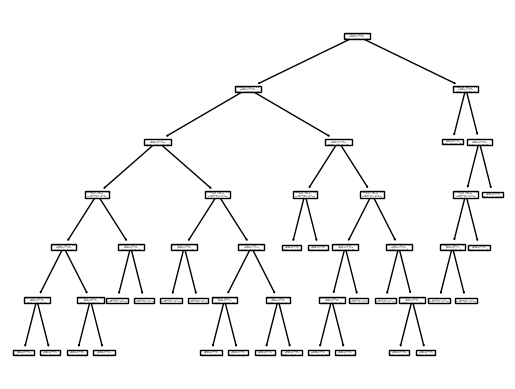

In [80]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

features = ['Obsession Type', 'Compulsion Type']

X = data[features]
y = data['Medications']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

In [81]:
from sklearn.tree import DecisionTreeClassifier, export_text

features = ['Obsession Type', 'Compulsion Type']
X = data[features]
y = data['Medications']

# Membuat dan melatih model DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X, y)

# Prediksi pada data fitur baru
new_data = pd.DataFrame({
    'Obsession Type': [0],
    'Compulsion Type': [0]
})

prediction = dtree.predict(new_data)
print("Prediction for medication:", prediction)

Prediction for medication: [0]


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Memilih kolom-kolom yang akan digunakan untuk klasifikasi
selected_columns = ['Obsession Type', 'Compulsion Type']

# Memisahkan kolom target (label) dan fitur (atribut)
X = data[selected_columns]
y = data['Medications']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek model Decision Tree Classifier
model = DecisionTreeClassifier()

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

# Memprediksi kelas target untuk data pengujian
y_pred = model.predict(X_test)

# Mengukur kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Menampilkan laporan klasifikasi
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.3027027027027027

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.36      0.36        74
           1       0.24      0.19      0.21        58
           2       0.27      0.34      0.30        53

    accuracy                           0.30       185
   macro avg       0.29      0.30      0.29       185
weighted avg       0.30      0.30      0.30       185



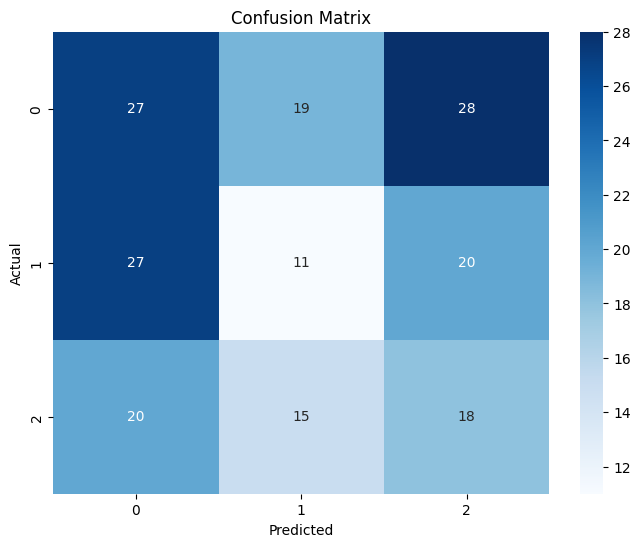

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan matriks kebingungan dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Memilih kolom-kolom yang akan digunakan untuk klasifikasi
selected_columns = ['Obsession Type', 'Compulsion Type']

# Memisahkan kolom target (label) dan fitur (atribut)
X = data[selected_columns]
y = data['Medications']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Memprediksi kelas target untuk data pengujian
y_pred = logistic_regression_model.predict(X_test)

# Mengukur kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Menampilkan laporan klasifikasi
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.32432432432432434

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.46      0.40        74
           1       0.29      0.45      0.35        58
           2       0.00      0.00      0.00        53

    accuracy                           0.32       185
   macro avg       0.22      0.30      0.25       185
weighted avg       0.23      0.32      0.27       185



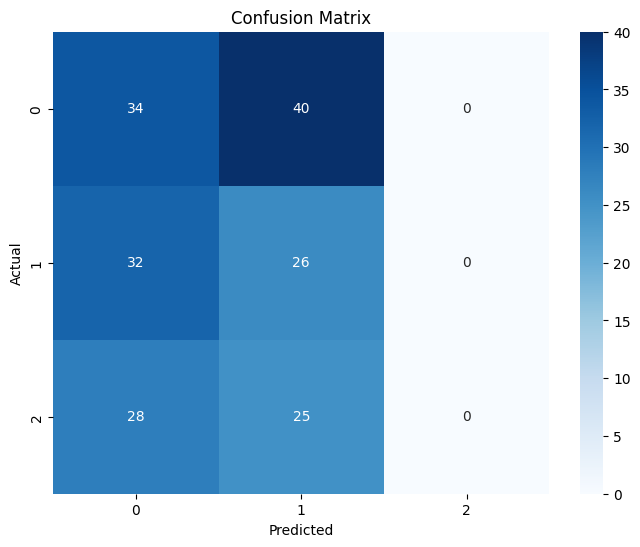

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan matriks kebingungan dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=logistic_regression_model.classes_, yticklabels=logistic_regression_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

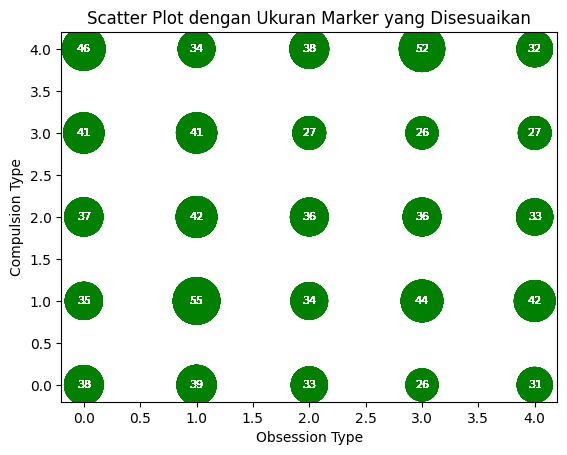

<Figure size 1000x600 with 0 Axes>

In [86]:
# Pilih dua kolom yang ingin diplot
x_column = 'Obsession Type'
y_column = 'Compulsion Type'

# Hitung jumlah data yang bersinggungan pada setiap titik
data['size_column'] = data.groupby([x_column, y_column])[x_column].transform('count')

# Penyesuaian skala ukuran marker
size_multiplier = 20
data['adjusted_size'] = data['size_column'] * size_multiplier

# Buat scatter plot dengan ukuran marker sesuai dengan jumlah data pada setiap titik
plt.scatter(data[x_column], data[y_column], s=data['adjusted_size'], alpha=0.5, color= 'green')

# Tambahkan label sumbu
plt.xlabel(x_column)
plt.ylabel(y_column)

# Tambahkan judul plot
plt.title('Scatter Plot dengan Ukuran Marker yang Disesuaikan')

for i, row in data.iterrows():
    plt.text(row[x_column], row[y_column], str(row['size_column']), color='white', fontsize=8, ha='center', va='center')
    
# Sesuaikan ukuran keseluruhan plot
plt.figure(figsize=(10, 6))

# Tampilkan plot
plt.show()